In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d

The temperature at 0.8 volts is of 192.444 plus or minus 2.447 Kelvin.


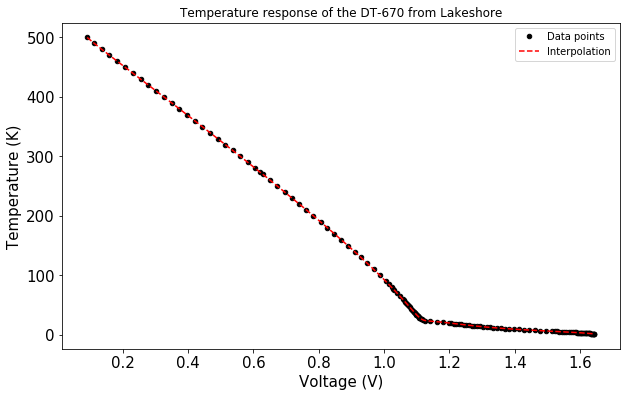

In [2]:
#I converted the txt file to a csv and imported the data as follows: 
temp, voltage, der = np.loadtxt("lakeshore2.csv",delimiter=',',unpack=True)

#Flip the data set so that we have the voltage in increasing order.
temp = temp[::-1]
voltage = voltage[::-1]
der = der[::-1]

#To keep the units consistent, we multiply the derivative data by 0.001. 
der = [d*0.001 for d in der]

#Can use interp1d to interpolate a cubic
f = interp1d(voltage, temp, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')

#The reason to extrapolate is to take derivatives over the full range


#Generate an array spanning the range of the values of V with 1001 points
x = np.linspace(voltage[0], voltage[-1], 1001)

def interpolation(V,plot=False):

    """
    Prints the interpolated voltage for a certain T
        -Inputs: V (float) Voltage of interest 
        -Outputs: prints T (float) at that V with interpolation
    """

    print(f'The temperature at {np.round(V,3)} volts is of {np.round(f(V),3)} plus or minus {np.round(error(V),3)} Kelvin.')
    
    if plot:
        fig,ax = plt.subplots(1,1,gridspec_kw={'height_ratios':[1]},figsize=(10,6))
        data = []
        for i in x:
            data.append(f(i))
        ax.plot(voltage, temp, marker='.',color='black',markersize=9, linestyle = '', label= 'Data points')
        ax.plot(x, data,'--' ,label = 'Interpolation',color='red')

        ax.set_xlabel('Voltage (V)',fontsize=15)
        ax.set_ylabel('Temperature (K)',fontsize=15)
        ax.set_title('Temperature response of the DT-670 from Lakeshore')
        ax.tick_params(labelsize=15)
        plt.legend()
        plt.show()

def d(function,x,dx):
    """
    Calculates the derivative of the function as defined in Question 1 of this assignment 
        -Inputs: function (function) The function to be differentiated
                 x (float) Point at which we are interested in
                 dx (float) Step size of the derivative 
        -Outputs: Derivative of the point evaluated at x
    """
    fp = (8*(function(x+dx)-function(x-dx))-(function(x+2.0*dx)-function(x-2.0*dx)))/(12*dx)
    return fp
    
        
def error(V):
    """
    Calculates the error of the interpolation at a certain point
        -Inputs: V (float) at which we want to find T using the interpolation
        -Ouputs: delta_x (float) Error of V due to interpolation
    """
    deriv = []
    steps = []
    #Take the derivative at each point and compare it to the output of the interpolation.
    for i in voltage:    
        fp = d(f,i,1e-4)
        deriv.append(fp)
    
    closest_V = np.abs(voltage-V) 
    close = min(closest_V)
    index = 0
    for i in range(len(closest_V)):
        if closest_V[i]==close:
            close_V = voltage[i]
            index = i 
    
    deriv = np.array(deriv)
    error_dx = np.abs(deriv-der)[index]*np.absolute(close_V-V)
    return error_dx

interpolation(0.8,plot=True)